# Homework #3 

Matriculation number: A0153347A
Email: e0025553@nus.edu.sg

### General Notes about this assignment 

Data:
X_train.npy: training data numpy array. Each row in the array corresponds to an image unrolled to a vector (50 x 37 = 1850 dimension)

y_train.npy: labels (0-6) of each data corresponding to the image in the same row in X_train.npy

X_test.npy: testing data numpy array for evaluation of your models. The prediction outputs on this test data is to be submitted for scoreboard

Ideas:
- multiclass SVM (see Multiclass classification)
- kNN with PCA 
- CNN  
- Viola-Jones face detector


### Files included with this submission

In my submission there are this iPython notebook file for the code part and my pdf regarding the essay.

## Building and evaluating models

In [26]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd 
%matplotlib inline
# Plotting with style! 
import seaborn as sb
from time import time
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix
import os
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

# Size the plot appropriately for online display
pl.rcParams['figure.figsize'] = (12.0, 10.0)

In [9]:
#Load dataset

#train data

xin= np.load("./X_train.npy")
yin= np.load("./y_train.npy")
xout= np.load("./X_test.npy")

from scipy.stats import itemfreq

freq= itemfreq(yin)

print (freq)
print(freq[:,1])
print(np.sum(freq[:,1]))
tot= np.sum(freq[:,1])
sample_weight=(1-(np.sinh(freq[:,1]/(tot)))) 
#print (sample_weight)
sample_weight = sample_weight / float(max(sample_weight))
sample_weight[3]= sample_weight[3]-0.2
print(sample_weight)

w2= 1.5 - freq[:,1]/max(freq[:,1])
print (w2)
w3= w2/np.sum(w2)
print(w3)


dic2= {0: 1.3708860759493671, 
 1: 1.0367088607594936, 
 2: 1.2848101265822784, 
 3: 0.5, 
 4: 1.2822784810126582, 
 5: 1.3481012658227849, 
 6: 1.2316455696202531}

dic1= {0: sample_weight[0],
      1: sample_weight[1],
      2: sample_weight[2],
      3: sample_weight[3],
      4: sample_weight[4],
      5: sample_weight[5],
      6: sample_weight[6],
     }

dic3= {0: w3[0],
      1: w3[1],
      2: w3[2],
      3: w3[3],
      4: w3[4],
      5: w3[5],
      6: w3[6],
     }


[[  0  51]
 [  1 183]
 [  2  85]
 [  3 395]
 [  4  86]
 [  5  60]
 [  6 106]]
[ 51 183  85 395  86  60 106]
966
[ 1.          0.85456142  0.96274654  0.41192862  0.96164933  0.99014741
  0.93968242]
[ 1.37088608  1.03670886  1.28481013  0.5         1.28227848  1.34810127
  1.23164557]
[ 0.17020273  0.12871287  0.15951595  0.06207764  0.15920163  0.16737388
  0.15291529]


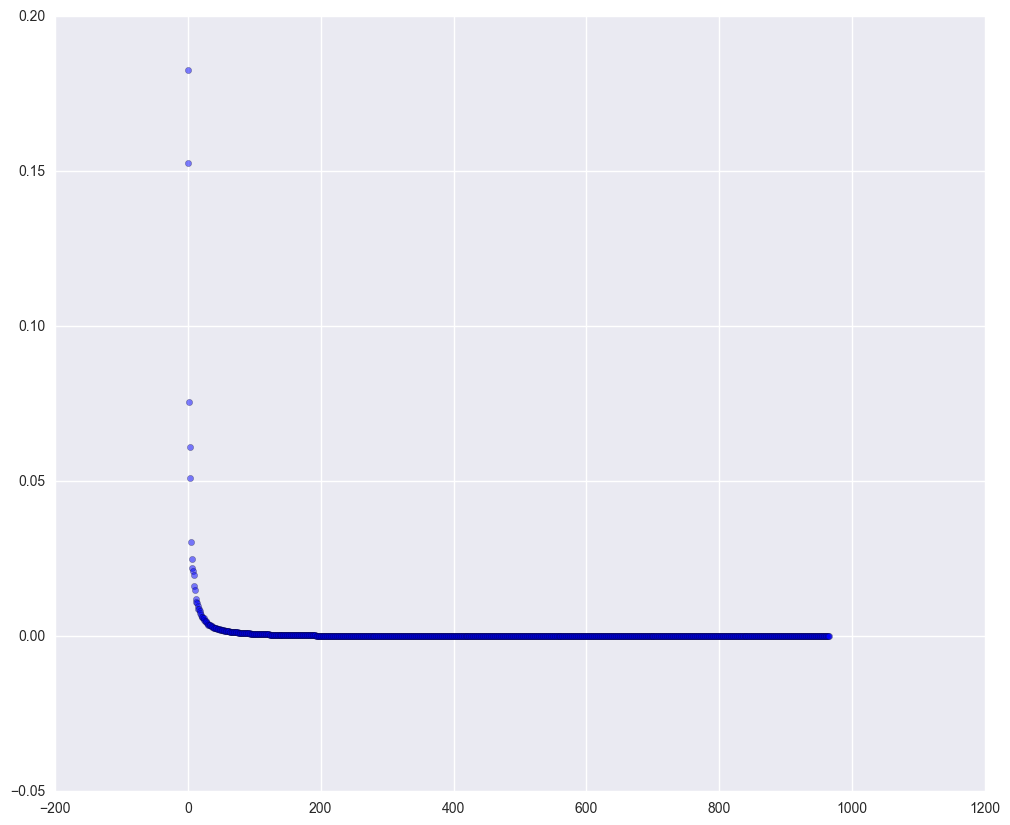

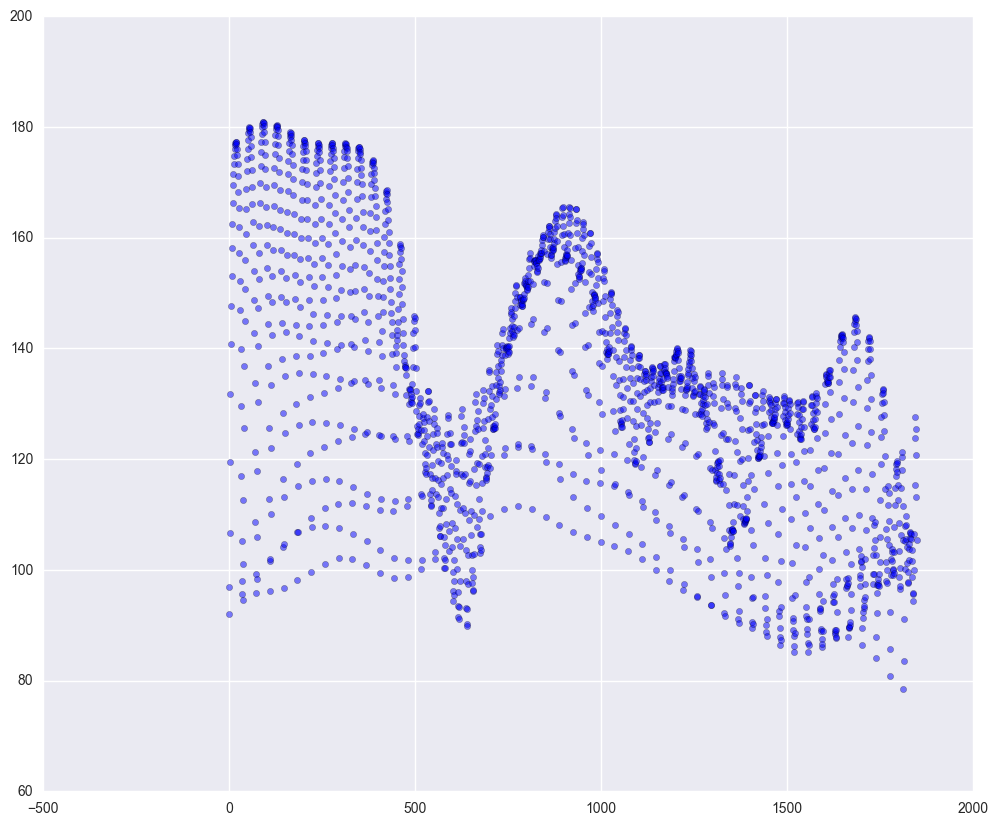

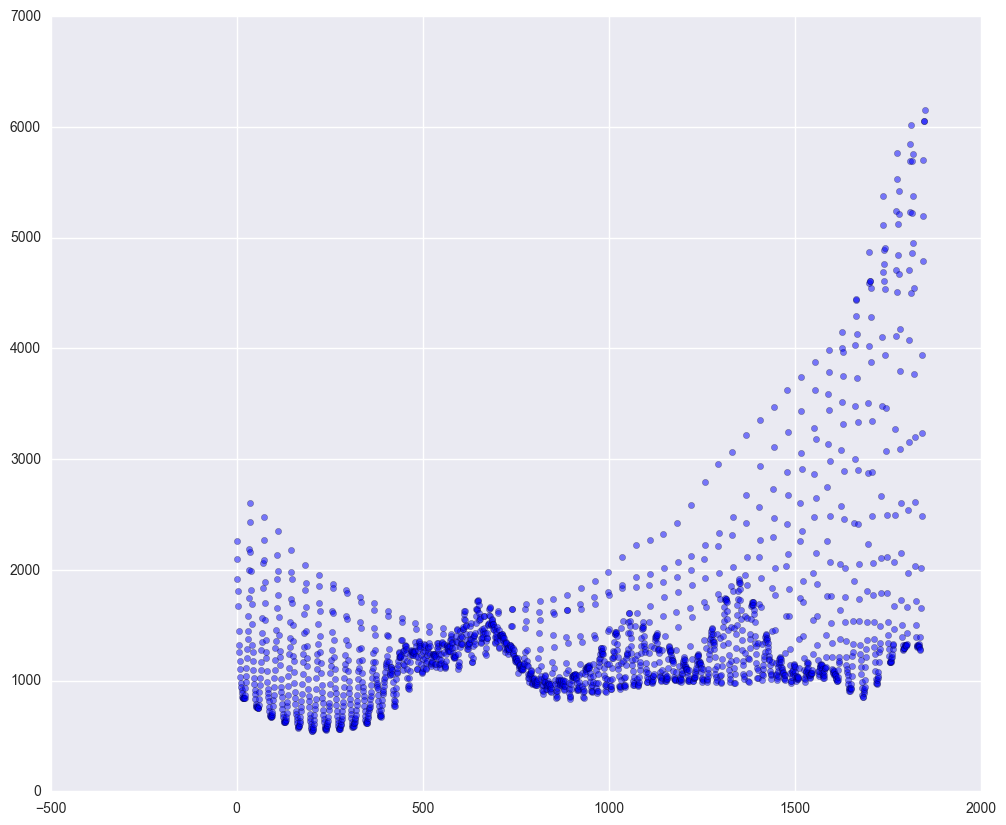

In [5]:
n_components= 966

avg= np.mean(xin, axis=0)
var= np.var(xin, axis=0)

pca = PCA(n_components=n_components, svd_solver='auto',
              whiten=True).fit(xin)

X_pca = pca.transform(xin)

#print(pca.explained_variance_ratio_.shape)
y=pca.explained_variance_ratio_
#take the highest expl. variance
#print(pca.explained_variance_)

#print(pca.explained_variance_)
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_ratio_.cumsum())

x = np.arange(0, n_components) 
#plt.xticks(x)
plt.scatter(x, y, alpha=0.5)
plt.show()

#avg= np.mean(X_pca, axis=0)
#var= np.var(X_pca, axis=0)

x1= np.arange(0,avg.shape[0])
plt.scatter(x1, avg, alpha=0.5)
plt.show()

x2= np.arange(0,var.shape[0])
plt.scatter(x2, var, alpha=0.5)
plt.show()

In [4]:
def dimReduction(n_components, X_train):

    h= 50
    w= 37
    t0 = time()
    print("Extracting the top %d eigenfaces from %d faces"
          % (n_components, X_train.shape[0]))
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)

    eigenfaces = pca.components_.reshape((n_components, h, w))

    #print("Projecting the input data on the eigenfaces orthonormal basis")
    X_pca = pca.transform(X_train)
    print("done in %0.3fs" % (time() - t0))
    return X_pca

In [17]:
def uniformDataset(x, y):
    freq= itemfreq(y)
    minOcc= min(freq[:,1])
    #print(minOcc)
    xtrain= np.empty((0,1850))
    ytrain= np.array([])
    xtest= np.empty((0,1850))
    ytest= np.array([])
    testsplit= np.array([])
    for i in range(y.shape[0]):
        freqnew= itemfreq(ytrain)
        if(freqnew.shape == (7,2)):
            occ= freqnew[y[i],1]
        else:
            occ= 0
        if(occ <= minOcc):
            xtrain= np.vstack((xtrain, [x[i, :]]))
            ytrain= np.append(ytrain, y[i])
        else:
            xtest= np.vstack((xtest, [x[i, :]]))
            ytest= np.append(ytest, y[i])
            testsplit= np.append(testsplit, i)
            
    return (xtrain, ytrain, xtest, ytest, testsplit)
    #print(xred.shape)
    #print(yred.shape)
    #print(itemfreq(yred))

(xtrain, ytrain, xtest, ytest, testsplit)=uniformDataset(xin, yin)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(testsplit.shape)

(363, 1850)
(363,)
(603, 1850)
(603,)
(603,)


In [23]:
def overSampling(x, y):
    sm = SMOTE(kind='svm')
    x_resampled, y_resampled = sm.fit_sample(x, y)
    return (x_resampled, y_resampled)

In [24]:
def underSampling(x, y):
    cc = ClusterCentroids()
    x_resampled, y_resampled = cc.fit_sample(x, y)
    return (x_resampled, y_resampled)

In [14]:
def svmModel(ker, xin,yin, c, g, d, coef):
    modelOVO= svm.SVC(decision_function_shape='ovo', class_weight='balanced', kernel=ker, C=c, gamma=g, degree=d, coef0=coef)
    modelOVO.fit(xin,yin)
    modelOVR= svm.SVC(decision_function_shape='ovr', class_weight='balanced',kernel=ker, C=c, gamma=g, degree=d, coef0=coef)
    modelOVR.fit(xin,yin)
    return (modelOVO,modelOVR)

In [6]:
def svmPredict(model,xin,yin):
    ypredict= model.predict(xin)
    score= f1_score(yin , ypredict, average='weighted')
    print(confusion_matrix(yin, ypredict))
    print(f1_score(yin, ypredict, average=None))
    return score

In [18]:
def createSubmission(filename, y):
    fo = open( filename , 'w' )
    fo.write("ImageId,PredictedClass\n")
    for i in range(y.shape[0]):
        fo.write(str(i)+","+str(y[i])+"\n")
    fo.close()

In [15]:
def weightedF1(y, predictions):
    f1= f1_score(y, predictions, average=None)
    print(f1)
    occ= itemfreq(y)
    print (occ)
    count= np.sum(occ[:,1])
    score= 0.0
    v=np.empty(occ[:,1].shape[0])
    for i in range(len(f1)):
        v[i]= (1-occ[i,1]/count)*f1[i]
        score = score+ (1-occ[i,1]/count)*f1[i]
        
    print (v)
    return score

y=[1, 3, 3, 3, 3, 1, 2,]
pred=[1, 2, 2, 3, 1, 1, 2]
r=weightedF1(y, pred)
print (r)
y=[1, 2, 2, 3,3,3]
pred= [1,2,2,3,2,2]
print(weightedF1(y,pred))

[ 0.8  0.5  0.4]
[[1 2]
 [2 1]
 [3 4]]
[ 0.57142857  0.42857143  0.17142857]
1.17142857143
[ 1.          0.66666667  0.5       ]
[[1 1]
 [2 2]
 [3 3]]
[ 0.83333333  0.44444444  0.25      ]
1.52777777778


In [29]:
ker= 'rbf'
c= 2.
g= 0.0078125
d= 1
coef= 0
dim= 80

x_in, y_in = underSampling(xin, yin)

x_in= dimReduction(dim, x_in)
#x_new,y_new= uniformDataset(xin, yin)
#x_new= dimReduction(dim, x_new)

models= svmModel(ker, x_in, y_in, c, g, d, coef)
scoreOVO= svmPredict(models[0], x_in, y_in)
scoreOVR= svmPredict(models[1], x_in, y_in)

#print ("OVO Ein: " + str(scoreOVO))
print ("OVR Ein: " + str(scoreOVR))

res= np.array([])
skf = StratifiedKFold(n_splits=5)

for train, test in skf.split(x_in, y_in):
    models= svmModel(ker, x_in[train], y_in[train], c, g, d, coef)
    #scoreOVO= svmPredict(models[0], x_in[test], yin[test])
    scoreOVR= svmPredict(models[1], x_in[test], y_in[test])
    #print("score ovo ")
    #print(scoreOVO)
    print("score ovr")
    print(scoreOVR)
    print("\n")
    res= np.append(res, scoreOVR)

print(np.mean(res))

Extracting the top 80 eigenfaces from 357 faces
done in 0.109s
[[51  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0]
 [ 0  0 51  0  0  0  0]
 [ 0  0  0 51  0  0  0]
 [ 0  0  0  0 51  0  0]
 [ 0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0 51]]
[ 1.  1.  1.  1.  1.  1.  1.]
[[51  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0]
 [ 0  0 51  0  0  0  0]
 [ 0  0  0 51  0  0  0]
 [ 0  0  0  0 51  0  0]
 [ 0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0 51]]
[ 1.  1.  1.  1.  1.  1.  1.]
OVR Ein: 1.0
[[ 8  0  0  0  1  2  0]
 [ 2  9  0  0  0  0  0]
 [ 0  1  8  2  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  1  0 10  0  0]
 [ 0  0  0  0  1 10  0]
 [ 0  1  0  2  0  0  8]]
[ 0.76190476  0.81818182  0.8         0.84615385  0.86956522  0.86956522
  0.84210526]
score ovr
0.829639446312


[[ 8  2  0  0  0  0  0]
 [ 1  8  0  0  1  0  0]
 [ 0  0  9  0  0  1  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0 10  0  0]
 [ 0  1  0  0  1  8  0]
 [ 2  0  2  0  2  0  4]]
[ 0.76190476  0.76190476  0.85714286  1.          0.83333333  0.84210526
 

In [ ]:
def chisq(xin, yin, k):
    mod = SelectKBest(chi2(xin, yin), k)
    

In [ ]:
import matplotlib.pyplot as plt

def plotchi(xin, yin):
    
    res= chi2(xin,yin)
    y= np.sort(res[0])
    
    n, bins, patches = plt.hist(y, 70, normed= True, facecolor='g')
    
    plt.xlabel('features')
    plt.ylabel('chi-out')
    plt.title('Chi-test')
    plt.axis([0, 1850, 0, 0.0030])
    plt.grid(True)
    plt.show()
    return y
    
r=plotchi(xin, yin)
print(r)

In [ ]:
chi2(xin, yin)
ker= 'rbf'
c= 2
g= 0.01
d= 1
coef= 0
dim= 80


models= svmModel(ker, x_in, yin, c, g, d, coef)
scoreOVO= svmPredict(models[0], x_in, yin)
scoreOVR= svmPredict(models[1], x_in, yin)

print ("OVO Ein: " + str(scoreOVO))
print ("OVR Ein: " + str(scoreOVR))

res= np.array([])
skf = StratifiedKFold(n_splits=50)

for train, test in skf.split(x_in, yin):
    models= svmModel(ker, x_in[train], yin[train], c, g, d, coef)
    scoreOVO= svmPredict(models[0], x_in[test], yin[test])
    scoreOVR= svmPredict(models[1], x_in[test], yin[test])
    print("score ovo ")
    print(scoreOVO)
    print("score ovr")
    print(scoreOVR)
    print("\n")
    res= np.append(res, scoreOVR)

print(np.mean(res))

In [20]:
x_in=dimReduction(80, xin)

models= svmModel('rbf', x_in, yin, 16, 0.0078125, 1 , 0)
scoreOVO= svmPredict(models[0], x_in, yin)
scoreOVR= svmPredict(models[1], x_in, yin)
print(scoreOVR)
y_pred= models[1].predict(x_in)
sc= f1_score(yin, y_pred, average='micro')
print("score "+str(sc))
x_out=dimReduction(80, xout)
y_pred=models[1].predict(x_out)
print(y_pred.shape)
print(xout.shape[0])
print(y_pred)
createSubmission("submission_1_24_10.csv", y_pred)

Extracting the top 80 eigenfaces from 966 faces
done in 0.234s
[[ 51   0   0   0   0   0   0]
 [  0 182   0   1   0   0   0]
 [  0   0  85   0   0   0   0]
 [  0   1   0 394   0   0   0]
 [  0   0   0   0  86   0   0]
 [  0   0   0   0   0  60   0]
 [  0   0   0   1   0   0 105]]
[ 1.          0.99453552  1.          0.99620733  1.          1.
  0.99526066]
[[ 51   0   0   0   0   0   0]
 [  0 182   0   1   0   0   0]
 [  0   0  85   0   0   0   0]
 [  0   1   0 394   0   0   0]
 [  0   0   0   0  86   0   0]
 [  0   0   0   0   0  60   0]
 [  0   0   0   1   0   0 105]]
[ 1.          0.99453552  1.          0.99620733  1.          1.
  0.99526066]
0.996893919944
score 0.996894409938
Extracting the top 80 eigenfaces from 322 faces
done in 0.089s
(322,)
322
[3 4 1 3 3 1 3 3 3 3 1 3 3 2 3 1 5 3 3 3 4 1 3 2 3 4 4 1 6 3 3 6 4 3 6 3 2
 6 3 3 3 3 3 3 3 3 3 1 3 3 2 3 1 3 1 3 6 1 1 3 1 3 1 6 5 2 1 2 0 3 1 4 2 4
 3 3 3 3 2 1 6 3 3 1 4 3 1 1 1 3 1 1 3 3 3 6 3 3 3 3 4 4 2 1 6 3 3 3 6 1 3
 3 2 3 2

In [ ]:
print(np.logspace(1, 2, 4, endpoint=True))